# Data Loading

In [1]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/EM/ks-projects-201612.csv', encoding='latin-1')

# Display the DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          ID                                               name   \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000004038                                     Where is Hank?   
2  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
3  1000011046  Community Film Project: The Art of Neighborhoo...   
4  1000014025                               Monarch Espresso Bar   

        category  main_category  currency             deadline   goal   \
0          Poetry     Publishing       GBP  2015-10-09 11:36:00   1000   
1  Narrative Film   Film & Video       USD  2013-02-26 00:20:50  45000   
2           Music          Music       USD  2012-04-16 04:24:11   5000   
3    Film & Video   Film & Video       USD  2015-08-29 01:00:00  19500   
4     Restaurants           Food       USD  2016-04-01 13:38:27  50000   

             laun

<ipython-input-1-8ecefc3ebd53>:8: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/EM/ks-projects-201612.csv', encoding='latin-1')


In [2]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [3]:
print("State Value Counts:")
print(df["state "].value_counts())

State Value Counts:
state 
failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
               ...  
2312               1
320                1
477                1
1404               1
2634               1
Name: count, Length: 410, dtype: int64


# Part 1: Data Cleaning

In [4]:
df.shape

(323750, 17)

In [5]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64


In [6]:
# Drop the last 4 rows
df = df.iloc[:, :-4]

In [7]:
df.shape

(323750, 13)

In [8]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged       3790
dtype: int64


## Drop missing values / Impute with mode or median

In [9]:
# Drop columns with more than 40% missing values
threshold = len(df) * 0.4
df_cleaned = df.dropna(axis=1, thresh=threshold)

In [10]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 ID                   0
name                 4
category             5
main_category        0
currency             0
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged       3790
dtype: int64


In [11]:
# Impute missing values for numerical and categorical columns
for col in df_cleaned.select_dtypes(include=["number"]).columns:df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
for col in df_cleaned.select_dtypes(include=["object"]).columns:df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

<ipython-input-11-215e27d9bc2a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in df_cleaned.select_dtypes(include=["number"]).columns:df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-11-215e27d9bc2a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [12]:
print("\nMissing values after handling:\n", df_cleaned.isnull().sum())


Missing values after handling:
 ID                0
name              0
category          0
main_category     0
currency          0
deadline          0
goal              0
launched          0
pledged           0
state             0
backers           0
country           0
usd pledged       0
dtype: int64


## Remove Duplicates

In [13]:
# Step 1.2: Remove Duplicate Rows
df_cleaned.drop_duplicates(inplace=True)

In [14]:
df_cleaned.shape

(323750, 13)

In [15]:
df_cleaned.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

## Standardize date columns

In [16]:
# strip spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [17]:
# Convert deadline and launched Columns
df_cleaned["deadline"] = pd.to_datetime(df_cleaned["deadline"], errors='coerce').dt.date
df_cleaned["launched"] = pd.to_datetime(df_cleaned["launched"], errors='coerce').dt.date

In [18]:
# If some rows still have non-date values, display them
invalid_dates = df_cleaned[df_cleaned["deadline"].isna() | df_cleaned["launched"].isna()]
print("Rows with invalid date values:\n", invalid_dates)

Rows with invalid date values:
                 ID                                      name  \
1454    1008705746                 Zephyra´s new full length   
1563    1009317190                            French Cuisine   
1794    1010871699   The Beginners Guide to being Unsuicidal   
1931    1011687764                   Best OnLine Classifieds   
2420     101453314               Social Media Ruined My Life   
...            ...                                       ...   
321945   989007729                           THROUGH MY EYES   
322162   990511774  Daniel Hresko's new CD is (almost) ready   
322204   990746749                        Feet on the Ground   
323138   996542939         'WANDER' - Apocalyptic Short Film   
323495    99851211           Art/sustainability/spirituality   

                                 category   main_category      currency  \
1454             'As The World Collapses'           Metal         Music   
1563             A Traditional Experience       C

In [19]:
# Drop rows where `deadline` or `launched` is still NaT
df_cleaned = df_cleaned.dropna(subset=["deadline", "launched"])

In [20]:
df_cleaned.shape

(323118, 13)

In [21]:
# Convert deadline to string before checking invalid values
df_cleaned["deadline"] = df_cleaned["deadline"].astype(str)
df_cleaned["launched"] = df_cleaned["launched"].astype(str)

# Detect invalid date formats (not matching YYYY-MM-DD pattern)
invalid_dates = df_cleaned[
    ~df_cleaned["deadline"].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False) |
    ~df_cleaned["launched"].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)
]

# Print problematic rows before fixing
print("Rows with invalid date values before correction:\n", invalid_dates)

Rows with invalid date values before correction:
 Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged]
Index: []


In [22]:
# If some rows still have non-date values, display them
invalid_dates = df_cleaned[df_cleaned["deadline"].isna() | df_cleaned["launched"].isna()]
print("Rows with invalid date values:\n", invalid_dates)

Rows with invalid date values:
 Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged]
Index: []


## Standardize categorical data for consistency

In [23]:
# Step 6: Standardize Categorical Data
df_cleaned["category"] = df_cleaned["category"].str.strip().str.lower()
df_cleaned["main_category"] = df_cleaned["main_category"].str.strip().str.lower()
df_cleaned["country"] = df_cleaned["country"].str.strip().str.upper()

In [24]:
# Display Cleaned Dataset
print("\nCleaned Dataset:\n")
df_cleaned.head()


Cleaned Dataset:



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,poetry,publishing,GBP,2015-10-09,1000,2015-08-11,0,failed,0,GB,0
1,1000004038,Where is Hank?,narrative film,film & video,USD,2013-02-26,45000,2013-01-12,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,music,music,USD,2012-04-16,5000,2012-03-17,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,film & video,film & video,USD,2015-08-29,19500,2015-07-04,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,restaurants,food,USD,2016-04-01,50000,2016-02-26,52375,successful,224,US,52375


# Part 2: Data Preprocessing

## Feature Engineering

In [25]:
# Convert deadline & launched to datetime format
df_cleaned["deadline"] = pd.to_datetime(df_cleaned["deadline"], errors='coerce')
df_cleaned["launched"] = pd.to_datetime(df_cleaned["launched"], errors='coerce')

In [26]:
# Calculate Project Duration
df_cleaned["project_duration"] = (df_cleaned["deadline"] - df_cleaned["launched"]).dt.days

In [27]:
# Create Funding Goal Ratio, converting the 2 columns to a numeric format
df_cleaned["usd pledged"] = pd.to_numeric(df_cleaned["usd pledged"], errors='coerce')
df_cleaned["goal"] = pd.to_numeric(df_cleaned["goal"], errors='coerce')

df_cleaned["funding_goal_ratio"] = df_cleaned["usd pledged"] / df_cleaned["goal"]

In [28]:
df_cleaned["funding_goal_ratio"].fillna(0, inplace=True)  # Replace NaN (caused by division by zero)

<ipython-input-28-884939acb310>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["funding_goal_ratio"].fillna(0, inplace=True)  # Replace NaN (caused by division by zero)


In [29]:
# Extract Launch Month and Day of the Week
df_cleaned["launch_month"] = df_cleaned["launched"].dt.month
df_cleaned["launch_day"] = df_cleaned["launched"].dt.dayofweek

In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [31]:
# Encoding Categorical Variables
label_encoders = {}
categorical_cols = ["category", "main_category", "country", "currency", "state"]

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store label encoders for later use

In [32]:
# Scaling Numerical Variables
num_cols = ["goal", "pledged", "backers", "project_duration", "funding_goal_ratio"]
scaler = MinMaxScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [33]:
from IPython.display import display
display(df_cleaned.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,project_duration,funding_goal_ratio,launch_month,launch_day
0,1000002330,The Songs of Adelaide & Abullah,107,12,5,2015-10-09,0.000010,2015-08-11,0.000000e+00,1,0.000000,9,0.0,0.003465,0.000000e+00,8,1
1,1000004038,Where is Hank?,92,6,12,2013-02-26,0.000450,2013-01-12,1.081666e-05,1,0.000014,21,220.0,0.002629,8.846015e-08,1,5
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,89,10,12,2012-04-16,0.000050,2012-03-17,4.916666e-08,1,0.000005,21,1.0,0.001733,3.618824e-09,3,5
3,1000011046,Community Film Project: The Art of Neighborhoo...,55,6,12,2015-08-29,0.000195,2015-07-04,6.308082e-05,0,0.000064,21,1283.0,0.003286,1.190500e-06,7,5
4,1000014025,Monarch Espresso Bar,122,7,12,2016-04-01,0.000500,2016-02-26,2.575104e-03,3,0.001021,21,52375.0,0.002031,1.895359e-05,2,4


# EDA

## Project Success Analysis

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

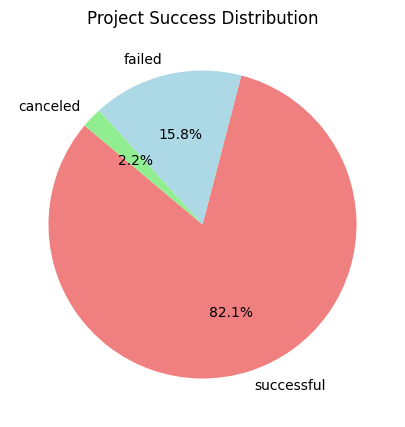

In [35]:
# Replace 'label_encoders' with your stored LabelEncoder dictionary if available
state_mapping = {0: 'failed', 1: 'successful', 2: 'canceled'}  # Example mapping
df_cleaned["state_decoded"] = df_cleaned["state"].map(state_mapping)

# Count the occurrences of each project state
state_counts = df_cleaned["state_decoded"].value_counts()

# Pie Chart - Percentage of project outcomes
plt.figure(figsize=(7, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title("Project Success Distribution")
plt.show()

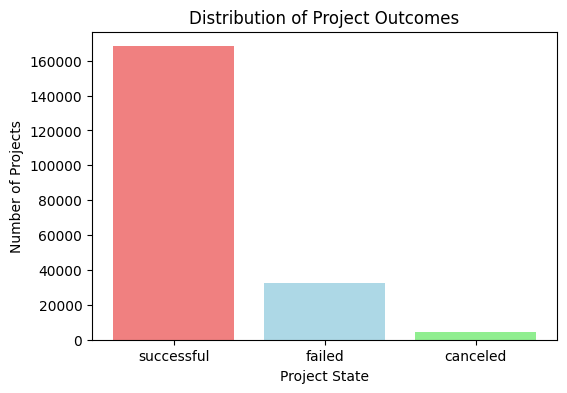

In [36]:
# Bar Chart - Count of each project outcome
plt.figure(figsize=(6, 4))
plt.bar(state_counts.index, state_counts.values, color=['lightcoral', 'lightblue', 'lightgreen'])
plt.xlabel("Project State")
plt.ylabel("Number of Projects")
plt.title("Distribution of Project Outcomes")
plt.show()

## Category Analysis

In [37]:
# Count the number of successful and unsuccessful projects for each category
category_success = df_cleaned.groupby(["category", "state"]).size().unstack(fill_value=0)

# Sort categories by the total number of projects (successful + unsuccessful) and select top 10
category_success_sorted = category_success.sum(axis=1).sort_values(ascending=False).head(10)
top_categories = category_success_sorted.index
category_success = category_success.loc[top_categories]

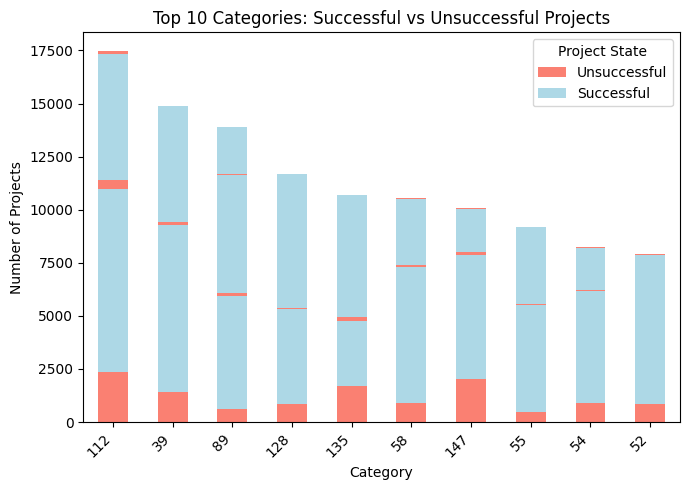

In [38]:
# Plot bar chart for successful vs unsuccessful projects in top 10 categories
category_success.plot(kind="bar", stacked=True, figsize=(7, 5), color=["salmon", "lightblue"])
plt.xlabel("Category")
plt.ylabel("Number of Projects")
plt.title("Top 10 Categories: Successful vs Unsuccessful Projects")
plt.xticks(rotation=45, ha="right")
plt.legend(["Unsuccessful", "Successful"], title="Project State")
plt.tight_layout()
plt.show()

In [39]:
# Calculate the average amount pledged for each category and select top 10
avg_pledged_by_category = df_cleaned.groupby("category")["usd pledged"].mean()
avg_pledged_by_category_sorted = avg_pledged_by_category.sort_values(ascending=False).head(10)


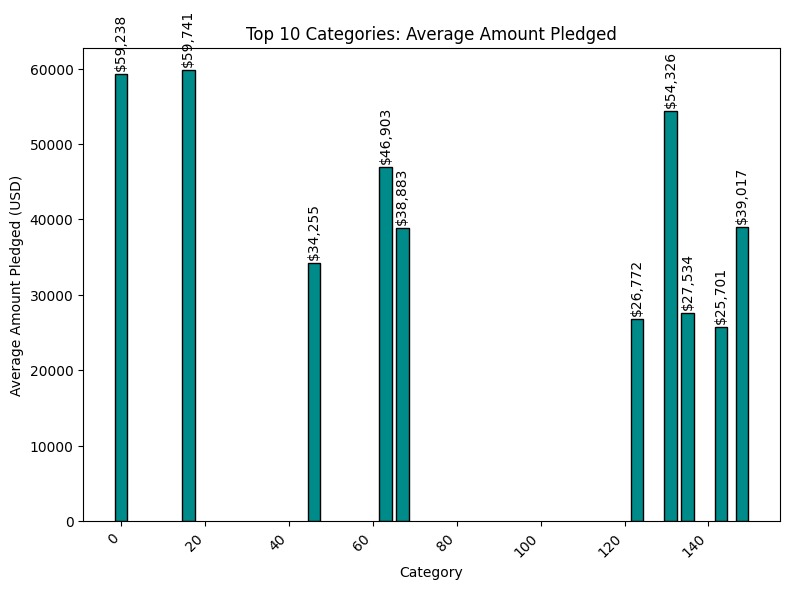

In [40]:
# Plot bar chart for average pledged amount in top 10 categories (Enhanced for Horizontal Labels)
plt.figure(figsize=(8, 6))
bars = plt.bar(
    avg_pledged_by_category_sorted.index,  # Category names
    avg_pledged_by_category_sorted.values,  # Average pledged amounts
    color="darkcyan",  # Change bar color
    edgecolor="black",  # Add edge color for clarity
    width=3.0  # Thicker bar width
)

plt.xlabel("Category", fontsize=10)
plt.ylabel("Average Amount Pledged (USD)", fontsize=10)
plt.title("Top 10 Categories: Average Amount Pledged", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add vertical data labels at the end of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the label on the bar
        height + 500,  # Position label slightly above the bar
        f"${height:,.0f}",  # Format value as currency
        ha="center",
        va="bottom",
        fontsize=10,
        rotation=90,  # Vertical orientation
        color="black"
    )

plt.tight_layout()
plt.show()


# Predictive Analytics

1. Data Preparation:

Encodes category as numerical values.
Converts state into a binary classification target (1 = successful, 0 = failed).

2. Feature Selection:

Includes goal, duration, and category as features.

3. Model Training:

Trains Logistic Regression and Random Forest models.

4. Evaluation:

Prints classification_report (precision, recall, F1-score) and accuracy for both models.

In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [42]:
print("Unique values in 'state' column:")
print(df_cleaned["state"].unique())

Unique values in 'state' column:
[1 0 3 2 5 4]


In [43]:
print("State Value Counts:")
print(df_cleaned["state"].value_counts())

State Value Counts:
state
1    168221
3    113081
0     32354
2      4428
5      3555
4      1479
Name: count, dtype: int64


In [44]:
# Define the state mapping
state_mapping = {1: "successful", 0: "failed", 2: "canceled", 3: "live", 4: "undefined", 5: "undefined"}

# Apply the mapping
df_cleaned["state"] = df_cleaned["state"].map(state_mapping)

# Print unique values again to verify mapping
print("Unique values in 'state' after mapping:")
print(df_cleaned["state"].unique())

Unique values in 'state' after mapping:
['successful' 'failed' 'live' 'canceled' 'undefined']


In [45]:
# Filter only successful and failed projects
df_filtered = df_cleaned[df_cleaned["state"].isin(["successful", "failed"])]

# Convert 'state' into binary values for ML (1 = successful, 0 = failed)
df_filtered["state"] = df_filtered["state"].apply(lambda x: 1 if x == "successful" else 0)

# Check class distribution after filtering
print("\nClass Distribution After Filtering:")
print(df_filtered["state"].value_counts())


Class Distribution After Filtering:
state
1    168221
0     32354
Name: count, dtype: int64


<ipython-input-45-c968d3bc7fce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["state"] = df_filtered["state"].apply(lambda x: 1 if x == "successful" else 0)


In [47]:
# Features for training
X = df_filtered[["backers", "launch_month", "launch_day", "project_duration"]]
y = df_filtered["state"]

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [49]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [50]:
# Evaluate Models
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6471
           1       0.84      1.00      0.91     33644

    accuracy                           0.84     40115
   macro avg       0.42      0.50      0.46     40115
weighted avg       0.70      0.84      0.77     40115

Accuracy: 0.84

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.18      0.04      0.07      6471
           1       0.84      0.96      0.90     33644

    accuracy                           0.81     40115
   macro avg       0.51      0.50      0.48     40115
weighted avg       0.73      0.81      0.76     40115

Accuracy: 0.81


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [52]:
# Compute confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

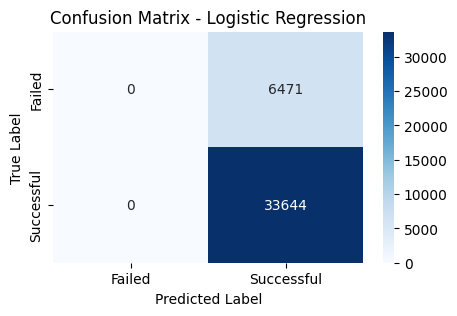

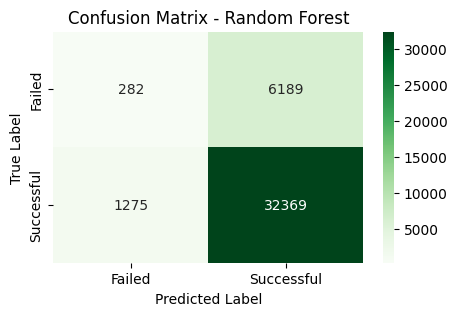

In [55]:
# Function to plot confusion matrices
def plot_confusion_matrix(cm, model_name, cmap):
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=["Failed", "Successful"], yticklabels=["Failed", "Successful"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot Confusion Matrix for Logistic Regression
plot_confusion_matrix(conf_matrix_log_reg, "Logistic Regression", "Blues")

# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(conf_matrix_rf, "Random Forest", "Greens")